In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-data-for-digit-recognation/t10k-images-idx3-ubyte.gz
/kaggle/input/mnist-data-for-digit-recognation/train-images.idx3-ubyte
/kaggle/input/mnist-data-for-digit-recognation/t10k-labels-idx1-ubyte.gz
/kaggle/input/mnist-data-for-digit-recognation/train-labels-idx1-ubyte.gz
/kaggle/input/mnist-data-for-digit-recognation/t10k-labels.idx1-ubyte
/kaggle/input/mnist-data-for-digit-recognation/t10k-images.idx3-ubyte
/kaggle/input/mnist-data-for-digit-recognation/train-labels.idx1-ubyte
/kaggle/input/mnist-data-for-digit-recognation/train-images-idx3-ubyte.gz


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.models import Input, InputLayer
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import h5py

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

<function matplotlib.pyplot.show(close=None, block=None)>

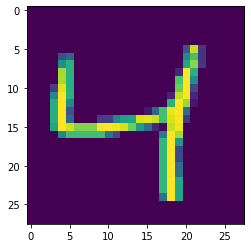

In [5]:
plt.imshow(x_train[2])
plt.show

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

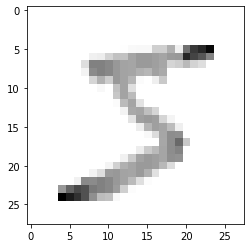

In [7]:
plt.imshow(x_train[0], plt.cm.binary)
plt.show

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

2022-05-12 09:59:58.612444: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-12 09:59:58.965760: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5761 - accuracy: 0.8975
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5174 - accuracy: 0.9467
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5043 - accuracy: 0.9583


In [9]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4969 - accuracy: 0.9654
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4915 - accuracy: 0.9706
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4874 - accuracy: 0.9745
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4857 - accuracy: 0.9760
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4832 - accuracy: 0.9784
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4807 - accuracy: 0.9809
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4798 - accuracy: 0.9820
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4785 - accuracy: 0.9830
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4778 - accuracy: 0.9837
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.476

In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4900 - accuracy: 0.9709
1.490004062652588 0.9708999991416931


In [11]:
predictions = model.predict([x_test])

In [12]:
print(predictions)

[[0.00000000e+00 4.83826704e-31 2.35550166e-31 ... 1.00000000e+00
  1.04679260e-37 0.00000000e+00]
 [2.26297916e-35 1.12780221e-13 1.00000000e+00 ... 0.00000000e+00
  1.05736804e-29 0.00000000e+00]
 [1.83143798e-32 1.00000000e+00 1.31026394e-24 ... 5.09979056e-16
  5.43402076e-17 1.01640891e-33]
 ...
 [2.14542163e-30 3.64587506e-26 9.88120175e-30 ... 6.04293565e-21
  1.48285567e-24 3.24529224e-20]
 [5.41819984e-27 1.31534965e-20 3.03837165e-35 ... 1.02970877e-26
  3.87545464e-13 1.80625819e-33]
 [3.46315419e-30 0.00000000e+00 9.64273786e-37 ... 0.00000000e+00
  1.69720029e-38 0.00000000e+00]]


In [13]:
print(np.argmax(predictions[28]))

0


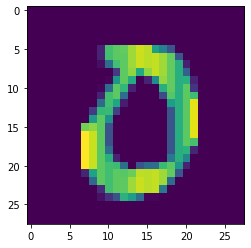

In [14]:
plt.imshow(x_test[28])
plt.show()